# Proyecto final de Python para Data Science
## Estudiante: Erick J. Pineda Amézquita
## Carnet:        17012140

Problema a resolver:

Crear un modelo lineal univariable para predecir el precio de casas en base a variables obtenidas, según los valores proporcionados en el archivo: "proyecto_training_data.npy"


#### Importar paquetes/librerías a utilizar:

In [179]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import lmplot
import sklearn as sl
from sklearn.linear_model import LinearRegression


Extracción de los datos a partir del archivo .npy

In [180]:
origenDeDatos = np.load('proyecto_training_data.npy')
type(origenDeDatos)

##np.savetxt("data.txt", OrigenDeDatos.tolist())
##OrigenDeDatos.tolist()


numpy.ndarray

### Separación de los datos en 80% y 20%

In [181]:
numDatosEntrenamiento=int(0.8*origenDeDatos.shape[0])
print("Cantidad de datos para ENTRENAMIENTO:   ", numDatosEntrenamiento)

numDatosValidacion=int(0.2*origenDeDatos.shape[0])
print("Cantidad de datos para VALIDACION:      ", numDatosValidacion)


Cantidad de datos para ENTRENAMIENTO:    1168
Cantidad de datos para VALIDACION:       292


#### Creación de Data Frames

In [182]:
dfEntrenamiento = pd.DataFrame(origenDeDatos[:numDatosEntrenamiento])
dfEntrenamiento.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

dfValidacion = pd.DataFrame(origenDeDatos[numDatosEntrenamiento:])
dfValidacion.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

print("Data Frame de Entrenamiento:   ",dfEntrenamiento.shape)
print("Data Frame de Validacion:      ",dfValidacion.shape)


Data Frame de Entrenamiento:    (1168, 6)
Data Frame de Validacion:       (292, 6)


#### Presentación de datos para ver como vienen

In [183]:
dfEntrenamiento.head(2)

,SalePrice,Overall,Floor,Rooms,Year,Front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0


#### Analitica de datos por medio de estadística

In [184]:
dfEntrenamiento.describe()

,SalePrice,Overall,Floor,Rooms,Year,Front
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


#### Media, minimo, maximo, rangos

In [185]:
dfEntrenamiento.mean(axis=0)


SalePrice    180590.277397
Overall           6.101027
Floor          1156.323630
Rooms             6.485445
Year           1971.451199
Front            69.946985
dtype: float64

In [186]:
dfEntrenamiento.min(axis=0)


SalePrice    34900.0
Overall          1.0
Floor          334.0
Rooms            2.0
Year          1875.0
Front           21.0
dtype: float64

In [187]:
dfEntrenamiento.max(axis=0)


SalePrice    755000.0
Overall          10.0
Floor          3228.0
Rooms            14.0
Year           2010.0
Front           313.0
dtype: float64

In [188]:
dfEntrenamiento.std(axis=0)


SalePrice    78815.697902
Overall          1.378025
Floor          373.780374
Rooms            1.609141
Year            29.951707
Front           23.478161
dtype: float64

#### Correlación entre todas las variables

In [189]:
dfEntrenamiento.corr()


,SalePrice,Overall,Floor,Rooms,Year,Front
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
Overall,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
Floor,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
Rooms,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
Year,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
Front,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


#### Rangos


In [190]:
print ("Intervalo SalePrice:   [", dfEntrenamiento["SalePrice"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Overall:     [", dfEntrenamiento["Overall"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Floor:       [", dfEntrenamiento["Floor"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Rooms:       [", dfEntrenamiento["Rooms"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Year:        [", dfEntrenamiento["Year"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Front:       [", dfEntrenamiento["Front"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")



Intervalo SalePrice:   [ 34900.0   -    755000.0 ]
Intervalo Overall:     [ 1.0   -    755000.0 ]
Intervalo Floor:       [ 334.0   -    755000.0 ]
Intervalo Rooms:       [ 2.0   -    755000.0 ]
Intervalo Year:        [ 1875.0   -    755000.0 ]
Intervalo Front:       [ 21.0   -    755000.0 ]


##  Graficas de cada Variable. Histogramas

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


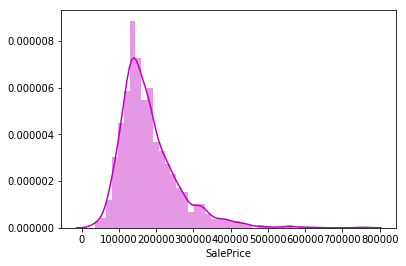

In [191]:
#sns.distplot(dfEntrenamiento["SalePrice"], hist=False, color="g", kde_kws={"shade": True})
sns.distplot(dfEntrenamiento["SalePrice"], color="m")


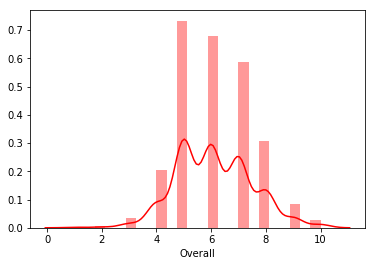

In [192]:
sns.distplot(dfEntrenamiento["Overall"], color="r")


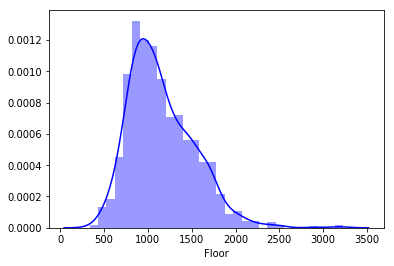

In [193]:
sns.distplot(dfEntrenamiento["Floor"], color="b")


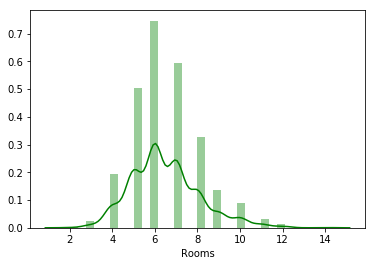

In [194]:
sns.distplot(dfEntrenamiento["Rooms"], color="g")


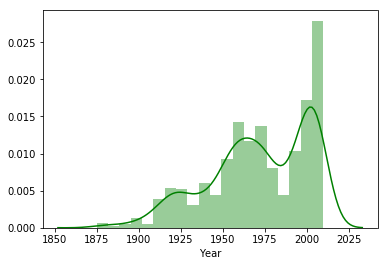

In [195]:
sns.distplot(dfEntrenamiento["Year"], color="g",bins=20)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


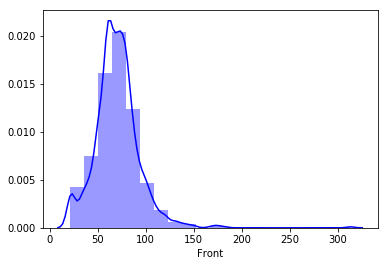

In [196]:
sns.distplot(dfEntrenamiento["Front"], color="b",bins=20)



# Graficas X,Y para observar el comportamiento del precio y sus variables

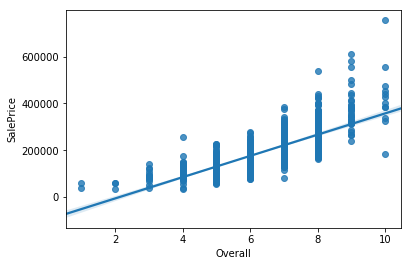

In [197]:
ax = sns.regplot(x="Overall", y="SalePrice", data=dfEntrenamiento)

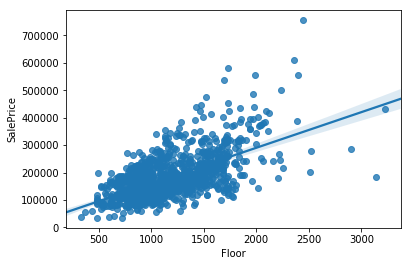

In [198]:
ax = sns.regplot(x="Floor", y="SalePrice", data=dfEntrenamiento)

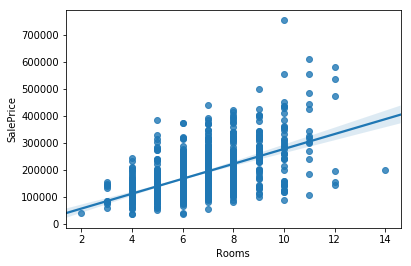

In [199]:
ax = sns.regplot(x="Rooms", y="SalePrice", data=dfEntrenamiento)

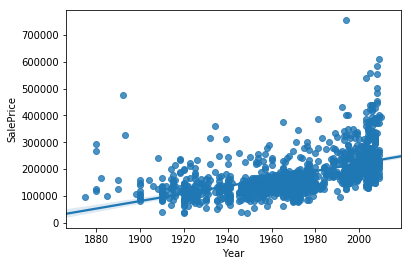

In [200]:
ax = sns.regplot(x="Year", y="SalePrice", data=dfEntrenamiento)

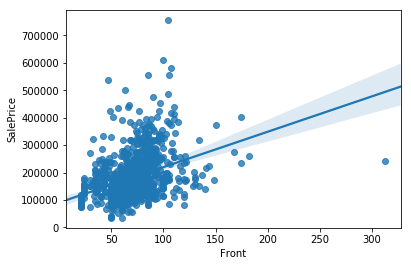

In [201]:
ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)

### Funcion de entrenamiento manual

## Se tomarán las 2 variables: Overall y Floor, segun la tendencia de las mismas

In [202]:
def regresionLineal(argX, argY, EPOCHS, imprimir_error_cada, lr):
    count=0
    mb=np.array([3.0, 19.0])
    
    ## convertir las Series a arreglos Numpy y pasarlos a columnas
    arrYconvertido=np.array([argY])
    arrYconvertido = arrYconvertido.reshape((-1,1))
    
    ## convertir las Series a arreglos Numpy y pasarlos a columnas
    arrXconvertido=np.array([argX])
    arrXconvertido = arrXconvertido.reshape((-1,1))
    
    #Arreglo mb, valores de X y 1's
    arrXUnos=np.column_stack(      (arrXconvertido,     np.ones_like(arrXconvertido)     ))

    ## Vectores que tendrán el acumulado del modelo mb y de los errores
    vectorDeErrores=[]
    vectorModeloMB=[]
    
    while count < EPOCHS:
        
        ## Al aplicar el producto escalar, se obtiene un vector de 1168 elementos, por lo cual se pasa a 1168 filas y 1 columna
        yhat=np.dot(arrXUnos,mb)
        yhat = yhat.reshape((-1,1))
        
        ## La formula para el error es: e=1/2 * promedio(y-yhat)^2
        arrError= 0.5*(np.mean(np.power(arrYconvertido-yhat,2)))
        
        ## La formula para el gradiente es: g=promedio(yhat-y)*X donde X es el arreglo de valores independientes.
        productoH=arrXUnos*(yhat - arrYconvertido)
        
        ## Se obtiene el promedio por columnas, axis=0
        gradiente = productoH.mean(axis=0)
        
        ## Asignación de nuevos valores a m y b, por medio del vector de 2 elementos llamado graidente
        mb-= lr * gradiente  
        #mb[0] = mb[0]-lr * gradiente
        #mb[1] = mb[1]-lr * gradiente
        
        
        #### Codigo que estaba dando el error
        ### Se utilizó list ya que de lo contrario los valores van cambiando porque la variable se va por referencia.
        ## al aplicaro de esta manera, la variable mb no es por referencia, es decir crea una copia idéntica.
        vectorModeloMB.append(list(mb))
        vectorDeErrores.append(arrError)
        
        if ((count % imprimir_error_cada == 0)):
            print("[No:", count, "] [M,B: ", 
                  mb , "] [Err:", arrError, "] [Grad: ",gradiente,"]")
        
        count+=1
        
    return vectorModeloMB,vectorDeErrores
    
##regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.00001)



### Resultados para Overall

In [203]:
resultadoOverall=regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.0001)
#print(resultadoOverall)

[No: 0 ] [M,B:  [121.77143947  37.05529743] ] [Err: 19402727699.22774 ] [Grad:  [-1187714.39469178  -180552.97431507] ]
[No: 10 ] [M,B:  [1283.63719348  213.57223075] ] [Err: 18013106637.04567 ] [Grad:  [-1140998.22761636  -173258.65149079] ]
[No: 20 ] [M,B:  [2399.80411935  382.95369491] ] [Err: 16730715435.205206 ] [Grad:  [-1096120.69399722  -166251.42440305] ]
[No: 30 ] [M,B:  [3472.07081055  545.48053356] ] [Err: 15547279581.286337 ] [Grad:  [-1053009.42968815  -159519.99366068] ]
[No: 40 ] [M,B:  [4502.16507228  701.42253701] ] [Err: 14455163074.91215 ] [Grad:  [-1011594.91862003  -153053.50458909] ]


### Resultados para floor

In [204]:
resultadoFloor=regresionLineal(dfEntrenamiento["Floor"], dfEntrenamiento["SalePrice"], 50, 10, 0.0000001)
#print(resultadoFloor)

[No: 0 ] [M,B:  [25.25089791 19.01771023] ] [Err: 18732119036.97774 ] [Grad:  [-2.22508979e+08 -1.77102307e+05] ]
[No: 10 ] [M,B:  [127.69494856  19.1007947 ] ] [Err: 2654408596.7684927 ] [Grad:  [-4.50232447e+07 -3.81206381e+04] ]
[No: 20 ] [M,B:  [148.42383495  19.11989144] ] [Err: 1996140600.6713014 ] [Grad:  [-9110159.30917348    -9998.60013044] ]
[No: 30 ] [M,B:  [152.61818866  19.12604068] ] [Err: 1969189196.2617154 ] [Grad:  [-1843379.76745127    -4308.28820676] ]
[No: 40 ] [M,B:  [153.4668871   19.12957008] ] [Err: 1968085719.9069004 ] [Grad:  [-372994.13200052   -3156.89033711] ]


##  Visualización de errores

#### Función para graficar error de una variable específica

In [205]:
def graficarError(arrErrores, atributoCasa):
    rangoEnEjeX = np.arange(np.size(arrErrores))
    etiqueta= 'Comportamiento del error para '+ str(atributoCasa)
    plt.ylabel('Eje Y - Error')
    plt.xlabel('Eje X - Numero de Iteracion')    
    plt.title(etiqueta)
    plt.plot(rangoEnEjeX, arrErrores)
    
    plt.show()
    

#### Función para graficar evolución del modelo entrenado

In [206]:
def graficarEvolucion(arrXALL, EPOCHS, graficarCada, strAributoCasa):
    count=0
    
    #rangoEnEjeX = np.arange(np.size(arrXALL))
    rangoEnEjeX = np.arange(np.linspace(min(arrXALL),max(arrXALL),1000))
    
    etiqueta= 'Comportamiento del modelo entrenado para '+ str(strAributoCasa)
    plt.ylabel('Eje Y - Modelo')
    plt.xlabel('Eje X - Numero de Iteracion')    
    plt.title(etiqueta)
    
    
    while count < EPOCHS:
        #
        if ((count % graficarCada == 0)):
            plt.plot(rangoEnEjeX, arrXALL[count])
            
        count+=1
        #### Código en construcción 
        #### Código en construcción 
        
    plt.show()
    

In [207]:
resultadoOverall=regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 1500, 500, 0.00019)
graficarEvolucion(resultadoOverall[0],15,5, "Overall")



#### Visualización de errores para el atributo Overall

[No: 0 ] [M,B:  [228.66573499  53.30506512] ] [Err: 19402727699.22774 ] [Grad:  [-1187714.39469178  -180552.97431507] ]
[No: 500 ] [M,B:  [29050.84237132  4088.93033002] ] [Err: 1401269798.7028935 ] [Grad:  [-26733.91048952    707.78281154] ]
[No: 1000 ] [M,B:  [29750.91768263  3735.48070814] ] [Err: 1390439814.0017393 ] [Grad:  [-1309.91880943  4655.73332397] ]


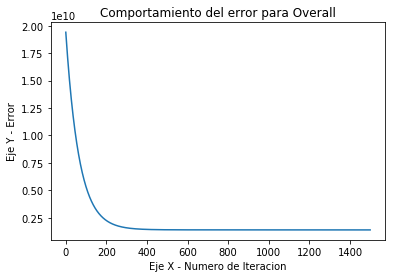

In [208]:
resultadoOverall=regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 1500, 500, 0.00019)
graficarError(resultadoOverall[1], "Overall")


#### Visualización de errores para el atributo Floor

[No: 0 ] [M,B:  [ 3.42276706 19.00033649] ] [Err: 18732119036.97774 ] [Grad:  [-2.22508979e+08 -1.77102307e+05] ]
[No: 500 ] [M,B:  [116.80665973  19.09184426] ] [Err: 2977693100.8104506 ] [Grad:  [-5.46064627e+07 -4.56248561e+04] ]
[No: 1000 ] [M,B:  [144.63247229  19.11635507] ] [Err: 2028847341.212531 ] [Grad:  [-1.34011018e+07 -1.33586581e+04] ]
[No: 1500 ] [M,B:  [151.46127035  19.12442399] ] [Err: 1971700962.9415283 ] [Grad:  [-3288794.98505496    -5440.13255458] ]
[No: 2000 ] [M,B:  [153.13714053  19.12845787] ] [Err: 1968259186.3934064 ] [Grad:  [-807109.40511424   -3496.82793624] ]
[No: 2500 ] [M,B:  [153.54841825  19.13150149] ] [Err: 1968051890.3289683 ] [Grad:  [-198072.97014357   -3019.91667554] ]
[No: 3000 ] [M,B:  [153.6493493  19.1343021] ] [Err: 1968039398.1298184 ] [Grad:  [-48607.87185674  -2902.87654034] ]
[No: 3500 ] [M,B:  [153.67411743  19.13704307] ] [Err: 1968038638.4317994 ] [Grad:  [-11927.28212055  -2874.15324475] ]
[No: 4000 ] [M,B:  [153.68019422  19.13976

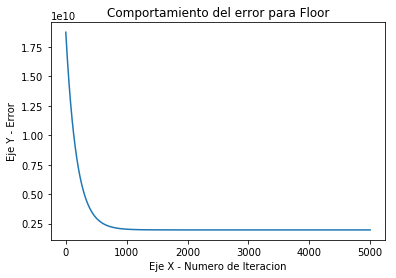

In [209]:
resultadoFloor=regresionLineal(dfEntrenamiento["Floor"], dfEntrenamiento["SalePrice"], 5000, 500, 0.0000000019)
graficarError(resultadoFloor[1], "Floor")


## Modelo con Sk

In [210]:
def entrenamientoSKT(x, y):
    modeloSkt = LinearRegression()    
    modeloSkt.fit(x,y)
    return np.append(modeloSkt.coef_.flatten(), modeloSkt.intercept_.flatten())



### Entrenando modelo

#### Entrenamiento para Overall 

In [211]:
serY = dfEntrenamiento["SalePrice"]
serX = dfEntrenamiento["Overall"]

xx=np.array(dfEntrenamiento["Overall"].values.tolist())
yy=np.array(dfEntrenamiento["SalePrice"].values.tolist())

print(entrenamientoSKT(xx.reshape(-1, 1), yy.reshape(-1, 1)))


[ 45411.99877916 -96469.57131874]


#### Entrenamiento para Floor

In [212]:
xx=np.array(dfEntrenamiento["Floor"].values.tolist())
yy=np.array(dfEntrenamiento["SalePrice"].values.tolist())

print(entrenamientoSKT(xx.reshape(-1, 1), yy.reshape(-1, 1)))


[  129.95124229 30324.58517496]


# Conclusiones finales: 

En base a los modelos entrenados manualmente y con la herramienta Sklearn, se pueden concluir los siguientes modelos para las variables: Overall y Floor, que según las graficas, y el analisis exploratorio, tienden a tener mayor relación con el precio de las casas:

Para Overall:
Y = 45411.99*X-96469.57

Para Floor:
Y = 129.95*X+30324.58





In [213]:

######## Codigo comentado que se ha optimizado

# lmplot(x, y, data=dsDatosEntrenamiento, fit_reg=False)
#dsDatosEntrenamiento.columns = ["Sequence", "Start", "End", "Coverage"]
##arrPrecio=dsDatosEntrenamiento[:,0]
##arrOver=dsDatosEntrenamiento[:,1]
##arrFloor=dsDatosEntrenamiento[:,2]
##arrRooms=dsDatosEntrenamiento[:,3]
##arrYear=dsDatosEntrenamiento[:,4]
##arrFront=dsDatosEntrenamiento[:,5]


##mediaPrecio=np.mean(dsPrecio)
##minPrecio=np.min(dsPrecio)
##maxPrecio=np.max(dsPrecio)
##stdPrecio=np.std(dsPrecio)

##dsOverallQual=dsDatosEntrenamiento[:,1]
##mediaOverallQual=np.mean(dsOverallQual)
##minOverallQual=np.min(dsOverallQual)
##maxOverallQual=np.max(dsOverallQual)
##stdOverallQual=np.std(dsOverallQual)
##print(mediaOverallQual)
##print(minOverallQual)
##print(maxOverallQual)
##print(stdOverallQual)


